# 2 Code
## 2.1 Imports

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold
from sklearn.svm import SVC
%matplotlib inline

## 2.2 Load and display the training data

features size: (500, 2)
labels size: (500,)


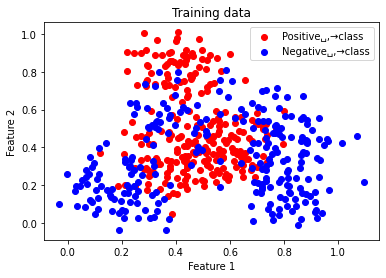

In [2]:
features = np.load("features.npy")
labels = np.load("labels.npy")
print("features size:", features.shape)
print("labels size:", labels.shape)

# Extract features for both classes
pos = labels == 1 # 1D array of booleans, with pos[i] = True if labels[i] == 1
features_pos = features[pos] # filter the array with the boolean array
neg = labels != 1
features_neg = features[neg]

# Display data
fig, ax = plt.subplots()
ax.scatter(features_pos[:, 0], features_pos[:, 1], c="red", label="Positive␣,→class")
ax.scatter(features_neg[:, 0], features_neg[:, 1], c="blue", label="Negative␣,→class")
ax.set_title("Training data")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.legend()

plt.show()

## 2.3 Training the SVM classifier with arbitrary hyperparameters

In [3]:
cost = 1
gamma = 1

# Train the SVM classifier.
svm = SVC(C=cost, kernel='rbf', gamma=gamma) # Gamma larger, region smaller
svm.fit(features, labels)

# Predict labels.
# Note that here we use the same set for training and testing,
# which is not the case in the remainder of the assignment.
predicted_labels = svm.predict(features)

# Compute the error.
# Note: since in Python, True and False are equivalent to 1 and 0, we can
# directly sum over the boolean array returned by the comparison operator.
error = sum(labels != predicted_labels)
print("Prediction error:", error)

Prediction error: 98


## 2.4 Training with K-fold cross-validation

### 2.4.1 Define test values for the cost and precision parameters

In [4]:
# K-1 training set, 1 valid set

def logsample(start, end, num):
    return np.logspace(np.log10(start), np.log10(end), num, base=10.0)

num_gammas = 20
num_costs = 20
gamma_range = logsample(1e-1, 1e3, num_gammas)
cost_range = logsample(1e-1, 1e3, num_costs)

### 2.4.2 Compute the cross-validation error for each parameter combination

#### The KFold class from scikit-learn is a “cross-validation” object, initialized with a number of folds.
#### For each fold, it randomly partitions the input data into a training set and a validation set. The
#### documentation provides an example of use.

In [5]:
K = 10 # number of folds for cross validation
kf = KFold(n_splits = K)
cv_error = np.zeros((num_gammas, num_costs)) # error matrix

# TODO (Question 1)
# /TODO (Question 1)

# Calculate each pair total error
Record_pair_error = np.zeros((num_gammas, num_costs))

# gamma_range and cost_range are numpy ndarray types
for gamma in range(len(gamma_range)):
    for cost in range(len(cost_range)):
        for train_index, test_index in kf.split(features):
            # Train the SVM classifier.
            svm = SVC(C = cost_range[cost], kernel = 'rbf', gamma = gamma_range[gamma]) # Gamma larger, region smaller
            svm.fit(features[train_index], labels[train_index])

            # Predict labels.
            # Note that here we use the same set for training and testing,
            # which is not the case in the remainder of the assignment.
            predicted_labels = svm.predict(features[test_index])

            # Compute the error.
            # Note: since in Python, True and False are equivalent to 1 and 0, we can
            # directly sum over the boolean array returned by the comparison operator.
            Record_pair_error[gamma][cost] = Record_pair_error[gamma][cost] + np.sum(labels[test_index] != predicted_labels)
        
        # Calculate the mean (K = 10) of the Record_pair_error and store in cv_error (final answer)
        cv_error[gamma][cost] = Record_pair_error[gamma][cost] / K
        
print("Prediction error:", cv_error)

Prediction error: [[29.2 26.7 22.  20.  20.5 20.5 20.3 19.7 18.6 17.6 15.5 13.2 11.6 10.4
  10.1 10.2 10.   9.9  9.6  9.6]
 [27.2 22.3 20.  20.4 20.1 19.7 18.7 17.5 15.6 13.3 11.7 10.4 10.2 10.
   9.8  9.9  9.7  9.7  9.5  9.4]
 [22.3 19.6 19.9 19.8 18.9 17.5 15.6 13.7 11.9 10.4 10.2  9.9  9.8  9.9
   9.7  9.6  9.5  9.5  9.6  9.6]
 [19.6 19.2 18.8 17.7 15.7 13.7 11.9 10.5 10.1 10.1 10.   9.9  9.8  9.8
   9.5  9.8  9.6  9.7  9.6  9.6]
 [17.9 17.7 15.9 13.8 12.1 10.7 10.1 10.1  9.8  9.9  9.9  9.8  9.6  9.6
   9.7  9.6  9.7  9.5  9.8  9.7]
 [16.3 14.1 12.4 10.6 10.2 10.1  9.8  9.9  9.9  9.8  9.6  9.5  9.7  9.7
   9.7  9.8  9.8  9.9  9.8  9.7]
 [12.6 11.3 10.3  9.9  9.8  9.8 10.   9.7  9.4  9.5  9.8  9.7  9.7  9.9
   9.9  9.8  9.6  9.4  9.3  8.9]
 [10.5  9.9 10.1  9.8  9.8  9.6  9.6  9.6  9.7  9.8  9.9  9.9  9.6  9.6
   9.2  8.8  9.3  9.3  9.6  9.6]
 [ 9.7  9.7  9.5  9.4  9.4  9.7 10.1  9.9  9.7  9.7  9.5  9.1  8.7  9.1
   9.5  9.5  9.7  9.5  9.8  9.6]
 [ 9.5  9.3  9.1  9.5  9.7 10.   9.5  

### 2.4.3 Train the classifier with the best parameter combination

In [6]:
# Find gamma and cost giving the smallest error

# TODO (Question 1)
# /TODO (Question 1)

# Define the minimum error appear in what index or position
gamma_index, cost_index = np.where(cv_error == np.min(cv_error))

# Set up the gamma and cost value individually
gamma = gamma_range[gamma_index]
cost = cost_range[cost_index]
print(gamma, cost)

# Train the SVM classifier using these parameters
svm = SVC(C = cost, kernel = 'rbf', gamma = gamma)
svm.fit(features, labels)
support_vectors = svm.support_vectors_

[33.59818286] [4.83293024]


### 2.4.4 Display cross-validation results and decision function

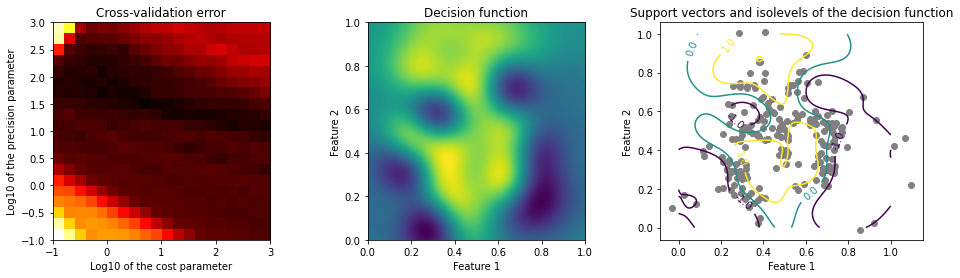

In [7]:
# Sample points on a grid
num_points = 100
x_rng = np.linspace(0, 1, num_points)
y_rng = np.linspace(0, 1, num_points)
grid_x, grid_y = np.meshgrid(x_rng, y_rng)

# Evaluate decision function for each point
xy_list = np.column_stack((grid_x.flat, grid_y.flat))
values = svm.decision_function(xy_list)
values = values.reshape((num_points, num_points))

# Display
fig = plt.figure(figsize=plt.figaspect(0.25))

ax = fig.add_subplot(1, 3, 1)
ax.set_title("Cross-validation error")
ax.set_xlabel("Log10 of the cost parameter")
ax.set_ylabel("Log10 of the precision parameter")
# TODO (Question 1)
# /TODO (Question 1)

# Use the imshow and colormap = 'hot' to observe the cv_error matrix
# Why use log to observe the result???????
ax.imshow(cv_error, extent=[-1, 3, -1, 3], origin='lower', cmap='hot')

ax = fig.add_subplot(1, 3, 2)
ax.set_title("Decision function")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
ax.imshow(values, extent=[0, 1, 0, 1], origin='lower')

ax = fig.add_subplot(1, 3, 3)
ax.set_title("Support vectors and isolevels of the decision function")
ax.set_xlabel("Feature 1")
ax.set_ylabel("Feature 2")
# TODO (Question 2)
# /TODO (Question 2)

# Record the x and y value
support_vectors_value_x = support_vectors[:, 0]
support_vectors_value_y = support_vectors[:, 1]
ax.scatter(support_vectors_value_x, support_vectors_value_y, c='gray')
# Plot the contour lines
CS = ax.contour(grid_x, grid_y, values, levels=[-1.0, 0.0, 1.0])
# Show the each lines value, ues fmt to limit significant digit
ax.clabel(CS, fmt='%0.1f')

plt.show()

## 2.5 Generalization error

### 2.5.1 Load the test data

In [8]:
# Load the training data
test_features = np.load("test_features.npy")
test_labels = np.load("test_labels.npy")
print(test_features.shape)
print(test_labels.shape)

(500, 2)
(500,)


### 2.5.2 Print the number of misclassified points in the test set

In [9]:
# TODO (Question 3)
# /TODO (Question 3 

# Through the training model to calculate the total error(test data) 
predicted_labels = svm.predict(test_features)

Total_Misclassified_Point = np.sum(test_labels != predicted_labels)
print(Total_Misclassified_Point)

90
